In [7]:
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt

%matplotlib inline

In der nächsten Zelle bitte den Dateinamen der Zeitreihe hinterlegen. Es werden folgende Spalten erwartet:

* ds: Das Datum der jeweiligen Messung (für die hier gewählten Einstellungen tägliche Daten)
* y: Die zum Datum gehörige Messung

In [8]:
FILE_NAME = "anrufe_mittelerde.csv"

In [11]:
data = pd.read_csv("data/%s" % FILE_NAME, parse_dates=["ds"])

Die ersten fünf Datensätze der importierten Daten:

In [12]:
data.head()

,ds,y
0,2013-02-01,146843.339859
1,2013-02-02,484435.915414
2,2013-02-03,406493.774371
3,2013-02-04,359385.463962
4,2013-02-05,336244.605460


Eine Visualisierung der Gesamtreihe:

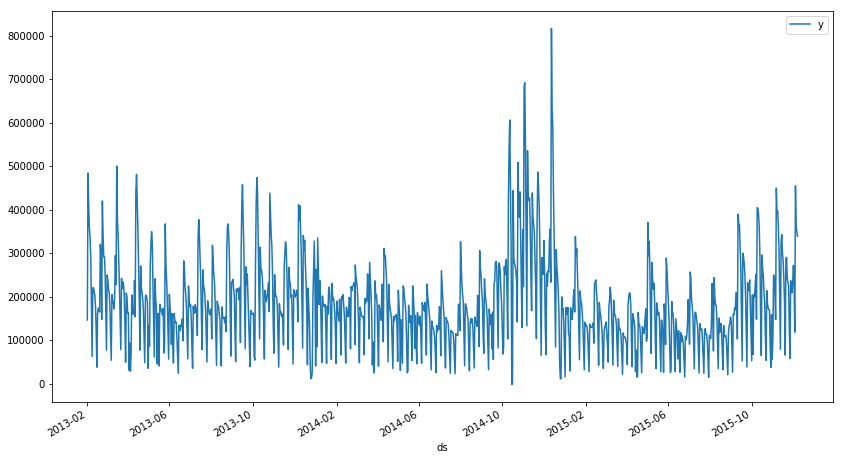

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
data.plot("ds", "y", ax=ax);

Ein paar Feiertage die hinzugefügt werden. Die Liste kann beliebig erweitert werden:

In [14]:
holidays = pd.DataFrame({
    "holiday": ["christmas"] * 4,
    "ds": ["2013-12-24", "2014-12-24", "2015-12-24", "2016-12-24"],
    "lower_window": [0] * 4,
    "upper_window": [2] * 4
})

In [15]:
m = fbprophet.Prophet(holidays=holidays)
m.fit(data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=365)

In [17]:
forecast = m.predict(future)

In [18]:
forecast.tail(5)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,christmas,christmas_lower,christmas_upper,holidays,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1401,2016-12-02,115033.464703,98542.789587,131359.223922,89510.549295,288396.654311,0.0,0.0,0.0,0.0,...,77275.903393,77275.903393,77275.903393,-15758.723397,-15758.723397,-15758.723397,93034.626790,93034.626790,93034.626790,192309.368096
1402,2016-12-03,114935.949779,98374.236565,131343.810258,155820.911812,354123.505725,0.0,0.0,0.0,0.0,...,140495.088389,140495.088389,140495.088389,44752.206212,44752.206212,44752.206212,95742.882176,95742.882176,95742.882176,255431.038167
1403,2016-12-04,114838.434854,98194.226787,131328.396593,149240.911337,359905.942398,0.0,0.0,0.0,0.0,...,139259.365164,139259.365164,139259.365164,41009.896824,41009.896824,41009.896824,98249.468341,98249.468341,98249.468341,254097.800019
1404,2016-12-05,114740.919930,98014.414788,131308.542752,148174.283912,347118.838287,0.0,0.0,0.0,0.0,...,131918.114641,131918.114641,131918.114641,31445.720346,31445.720346,31445.720346,100472.394295,100472.394295,100472.394295,246659.034571
1405,2016-12-06,114643.405005,97835.210444,131267.111399,129352.957621,334546.093891,0.0,0.0,0.0,0.0,...,117002.296431,117002.296431,117002.296431,14670.122686,14670.122686,14670.122686,102332.173745,102332.173745,102332.173745,231645.701436


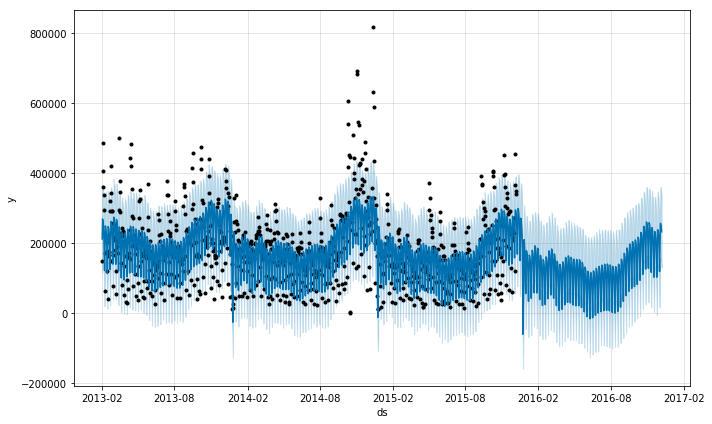

In [19]:
m.plot(forecast);

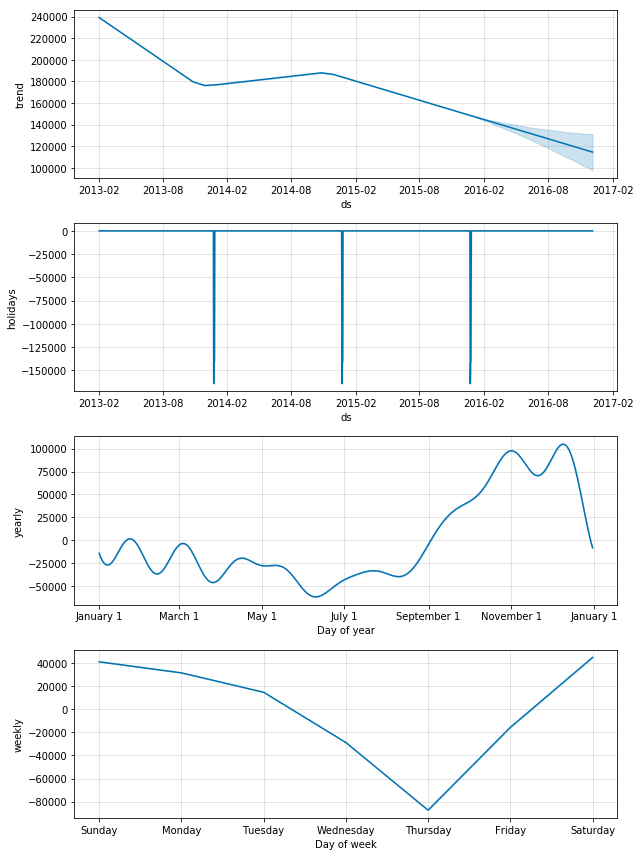

In [20]:
m.plot_components(forecast);